In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

In [4]:

train=pd.read_excel(r'C:\Users\krs035\Desktop\2nd week project\train_agriculture.xlsx')
test=pd.read_excel(r'C:\Users\krs035\Desktop\2nd week project\test_agriculture.xlsx')
train.head()


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
test.head()


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
ID = pd.DataFrame(test.ID)


In [7]:
test = test.drop('ID',axis=1)
train = train.drop('ID',axis=1)


In [9]:
train.shape


(1199, 8)

In [10]:
test.shape

(1199, 8)

In [11]:

train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [12]:
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [13]:

missing_train = train.isnull().sum()/len(train)*100
missing_train

Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          9.610785
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.000000
dtype: float64

In [14]:
missing_test = train.isnull().sum()/len(test)*100
missing_test

Estimated_Insects_Count     0.000000
Crop_Type                   0.000000
Soil_Type                   0.000000
Pesticide_Use_Category      0.000000
Number_Doses_Week           0.000000
Number_Weeks_Used          36.864053
Number_Weeks_Quit           0.000000
Season                      0.000000
Crop_Damage                 0.000000
dtype: float64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [16]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [17]:
train.Number_Weeks_Used.fillna(28,inplace = True)
test.Number_Weeks_Used.fillna(28,inplace = True)

In [18]:
train.Number_Weeks_Used.fillna(28,inplace = True)
test.Number_Weeks_Used.fillna(28,inplace = True)

In [19]:

train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [20]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(train[['Estimated_Insects_Count']])
train['Estimated_Insects_Count'] = pt.transform(train[['Estimated_Insects_Count']])

In [21]:

pt.fit(train[['Number_Weeks_Quit']])
train['Number_Weeks_Quit'] = pt.transform(train[['Number_Weeks_Quit']])


In [22]:

pt.fit(train[['Number_Weeks_Quit']])
train['Number_Weeks_Quit'] = pt.transform(train[['Number_Weeks_Quit']])


In [23]:

pt.fit(train[['Number_Weeks_Used']])
train['Number_Weeks_Used'] = pt.transform(train[['Number_Weeks_Used']])


In [24]:
pt.fit(test[['Estimated_Insects_Count']])
test['Estimated_Insects_Count'] = pt.transform(test[['Estimated_Insects_Count']])
pt.fit(test[['Number_Weeks_Quit']])
test['Number_Weeks_Quit'] = pt.transform(test[['Number_Weeks_Quit']])
pt.fit(test[['Number_Doses_Week']])
test['Number_Doses_Week'] = pt.transform(test[['Number_Doses_Week']])
pt.fit(test[['Number_Weeks_Used']])
test['Number_Weeks_Used'] = pt.transform(test[['Number_Weeks_Used']])

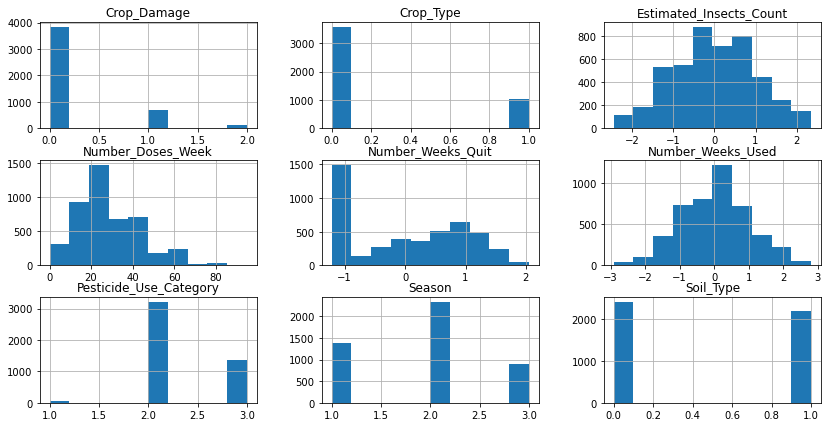

In [25]:
train.hist(bins=10,figsize=(14,7));


In [26]:
train.skew()

Estimated_Insects_Count   -0.032846
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used         -0.005302
Number_Weeks_Quit         -0.012049
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

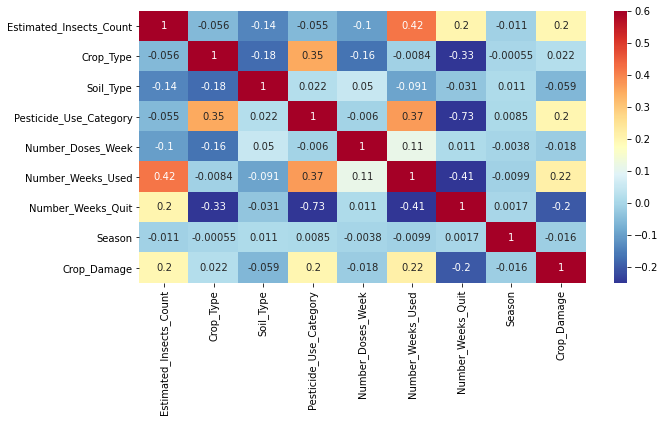

In [27]:
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,plot_confusion_matrix,recall_score


In [29]:

X = train.drop('Crop_Damage',axis=1)
y = train['Crop_Damage']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=100)


In [31]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

81.23188405797102

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

81.3768115942029

In [33]:

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100


82.89855072463767

In [34]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)*100


82.82608695652173